In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('train.csv')
dataset.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5    ...         s17_av   s17_std  s18_av  s18_std  s19_av  s19_std  \
0  14.62    ...     392.000000  0.000000  2388.0      0.0   100.0      0.0   
1  14.62    ...     392.000000  0.000000  2388.0      0.0   100.0      0.0   
2  14.62    ...     391.333333  1.154701  2388.0      0.0   100.0      0.0   
3  14.62    ...     391.500000  1.000000  2388.0      0.0   100.0      0.0   
4  14.62    ...     391.800000  1.095445  2388.0      0.0   100.0      0.0   

      s20_av   s20_std     s21_av   s21_std  
0  39.060000  0.000000  23.419000  0.000000  
1  39.030000  0.042426  23.421300  0.003253  
2  39.003333  0.055076  23.395600  0.044573  
3  38.972500  0.076322  23.390175  0.037977  
4  38.958000  0.073621  23.393020  0.033498  

[5 rows x 71 columns]

In [3]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [4]:
df=dataset[featurs+['ttf']]
df.head()

setting1  setting2  setting3      s1      s2       s3       s4     s5  \
0   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60  14.62   
1    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14  14.62   
2   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20  14.62   
3    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87  14.62   
4   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22  14.62   

      s6      s7 ...       s13      s14     s15   s16  s17   s18    s19  \
0  21.61  554.36 ...   2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  21.61  553.75 ...   2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  21.61  554.26 ...   2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  21.61  554.45 ...   2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  21.61  554.00 ...   2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  ttf  
0  39.06  23.4190  191  
1  39.00  23.4236  190  
2  38.95  23.3442  189  
3  38.88  23.3739  188  
4  38.90  23.4044  187  

[5 rows x 25 columns]

In [5]:
df[featurs].corrwith(df.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.041754e-16
s5         -6.041754e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [8]:
low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']

In [9]:
correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

In [6]:
cdf=pd.DataFrame(df[featurs].corrwith(df.ttf).sort_values(ascending=False),columns=['corr_value'])

In [7]:
cdf.reset_index(level=0,inplace=True)

In [8]:
cdf['abs_value']=abs(cdf.corr_value)
cdf

index    corr_value     abs_value
0        s12  6.719831e-01  6.719831e-01
1         s7  6.572227e-01  6.572227e-01
2        s21  6.356620e-01  6.356620e-01
3        s20  6.294285e-01  6.294285e-01
4        s16 -6.041754e-16  6.041754e-16
5         s5 -6.041754e-16  6.041754e-16
6   setting2 -1.947628e-03  1.947628e-03
7   setting1 -3.198458e-03  3.198458e-03
8         s6 -1.283484e-01  1.283484e-01
9        s14 -3.067689e-01  3.067689e-01
10        s9 -3.901016e-01  3.901016e-01
11       s13 -5.625688e-01  5.625688e-01
12        s8 -5.639684e-01  5.639684e-01
13        s3 -5.845204e-01  5.845204e-01
14       s17 -6.061536e-01  6.061536e-01
15        s2 -6.064840e-01  6.064840e-01
16       s15 -6.426670e-01  6.426670e-01
17        s4 -6.789482e-01  6.789482e-01
18       s11 -6.962281e-01  6.962281e-01
19  setting3           NaN           NaN
20        s1           NaN           NaN
21       s10           NaN           NaN
22       s18           NaN           NaN
23       s19           NaN           NaN

In [9]:
selected_features=list(cdf[cdf.abs_value>0.1]['index'].values)
selected_features

['s12',
 's7',
 's21',
 's20',
 's6',
 's14',
 's9',
 's13',
 's8',
 's3',
 's17',
 's2',
 's15',
 's4',
 's11']

In [10]:
df1=df[selected_features+['ttf']]
df1.head()

s12      s7      s21    s20     s6      s14       s9      s13       s8  \
0  521.66  554.36  23.4190  39.06  21.61  8138.62  9046.19  2388.02  2388.06   
1  522.28  553.75  23.4236  39.00  21.61  8131.49  9044.07  2388.07  2388.04   
2  522.42  554.26  23.3442  38.95  21.61  8133.23  9052.94  2388.03  2388.08   
3  522.86  554.45  23.3739  38.88  21.61  8133.83  9049.48  2388.08  2388.11   
4  522.19  554.00  23.4044  38.90  21.61  8133.80  9055.15  2388.04  2388.06   

        s3  s17      s2     s15       s4    s11  ttf  
0  1589.70  392  641.82  8.4195  1400.60  47.47  191  
1  1591.82  392  642.15  8.4318  1403.14  47.49  190  
2  1587.99  390  642.35  8.4178  1404.20  47.27  189  
3  1582.79  392  642.35  8.3682  1401.87  47.13  188  
4  1582.85  393  642.37  8.4294  1406.22  47.28  187

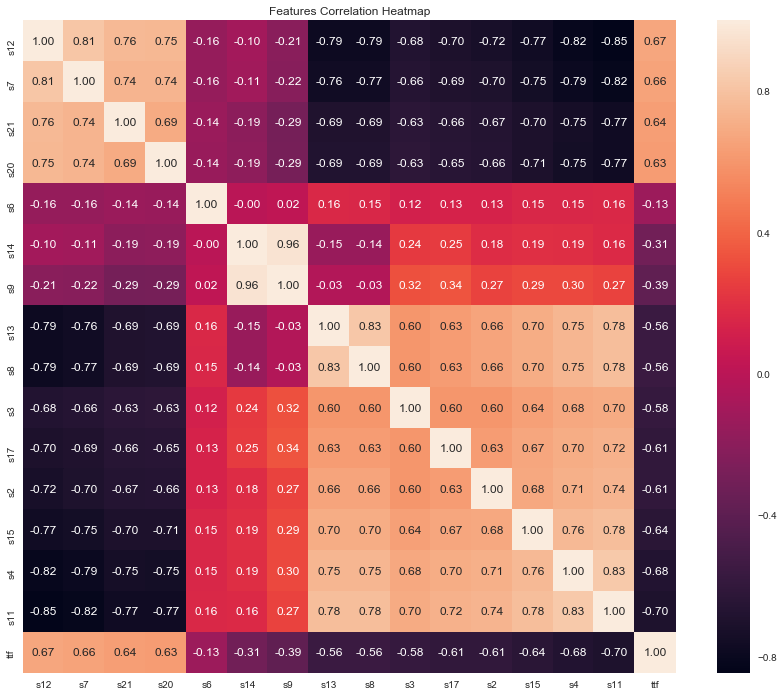

In [11]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

cm = np.corrcoef(df1.values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(15, 12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},yticklabels=df1.columns, xticklabels=df1.columns)
plt.title('Features Correlation Heatmap')
plt.show()

In [12]:
def find_correlation(data, threshold=0.8):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [13]:
corr_col=find_correlation(df1)
corr_col

['s12', 's14', 's13', 's4']

In [14]:
df1=df1.drop(columns=corr_col,axis=1)
df1.shape

(20631, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B404DD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001694B7F0>]], dtype=object)

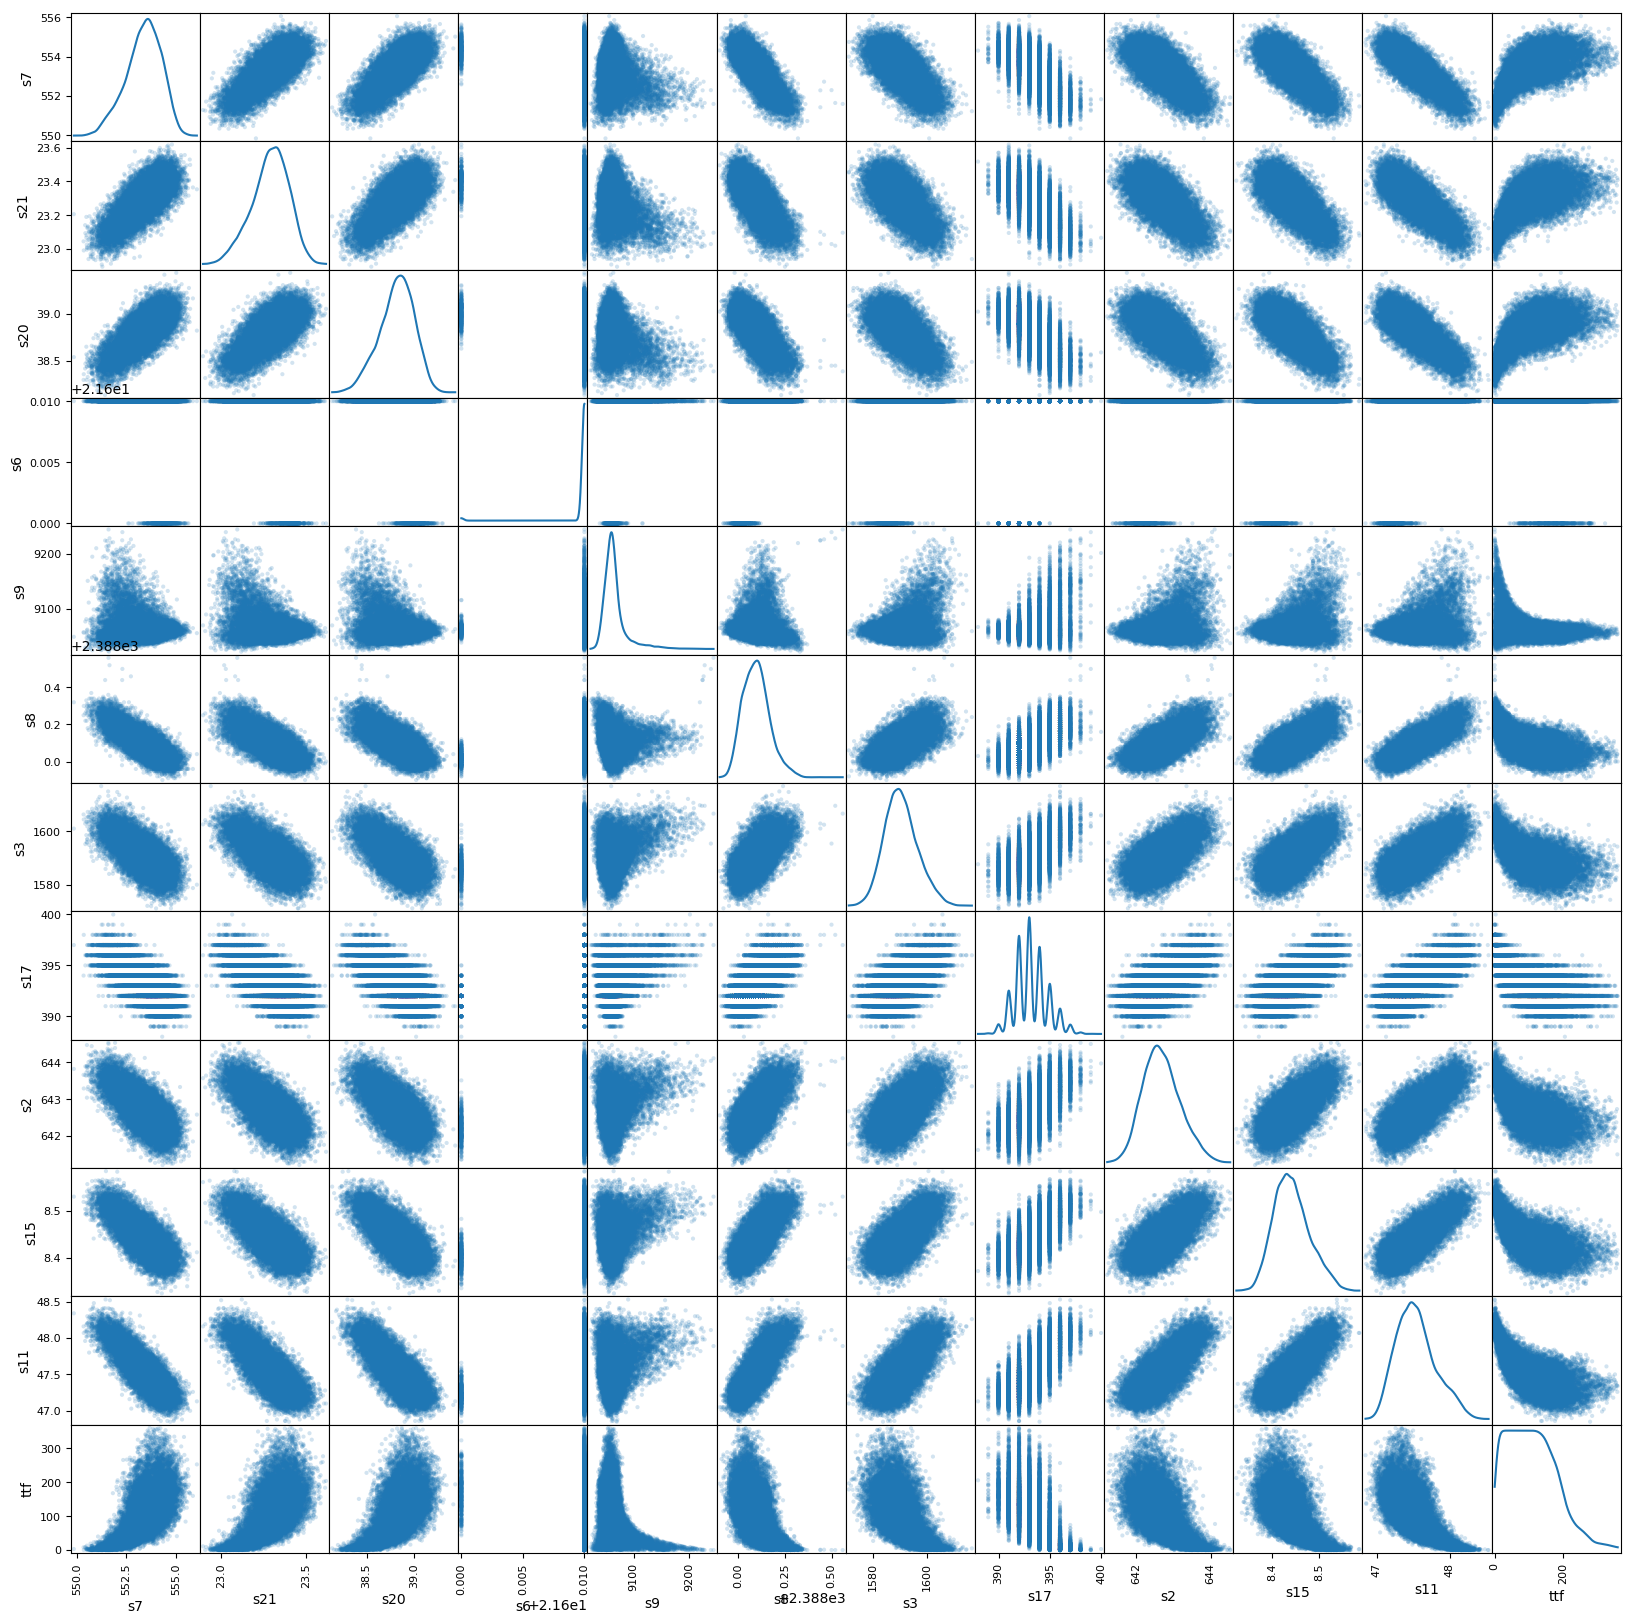

In [15]:
from pandas.plotting import scatter_matrix
sns.reset_orig()
scatter_matrix(df1, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [16]:
def plot_time_series(s):
    
    """Plot time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df_temp = dataset[['cycle', s]][dataset.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df_temp['cycle'],df_temp[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [18]:
list(set(selected_features)-set(corr_col))

['s9', 's8', 's3', 's17', 's11', 's7', 's6', 's15', 's20', 's21', 's2']

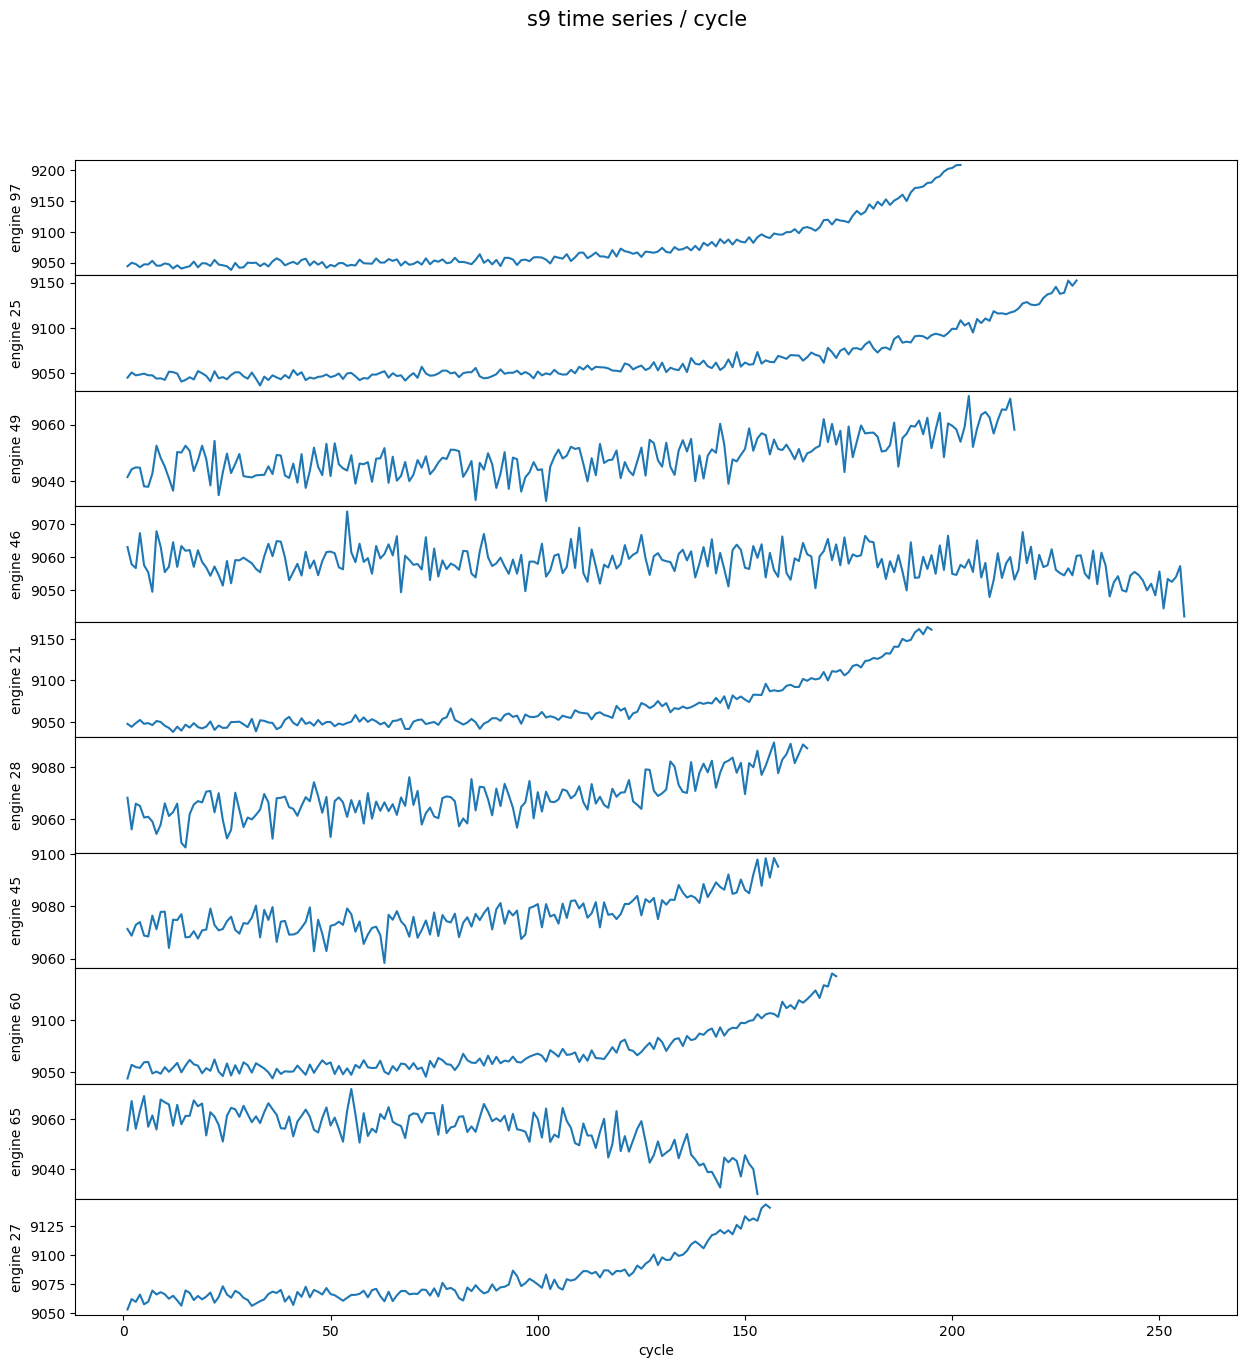

In [19]:
plot_time_series('s9')

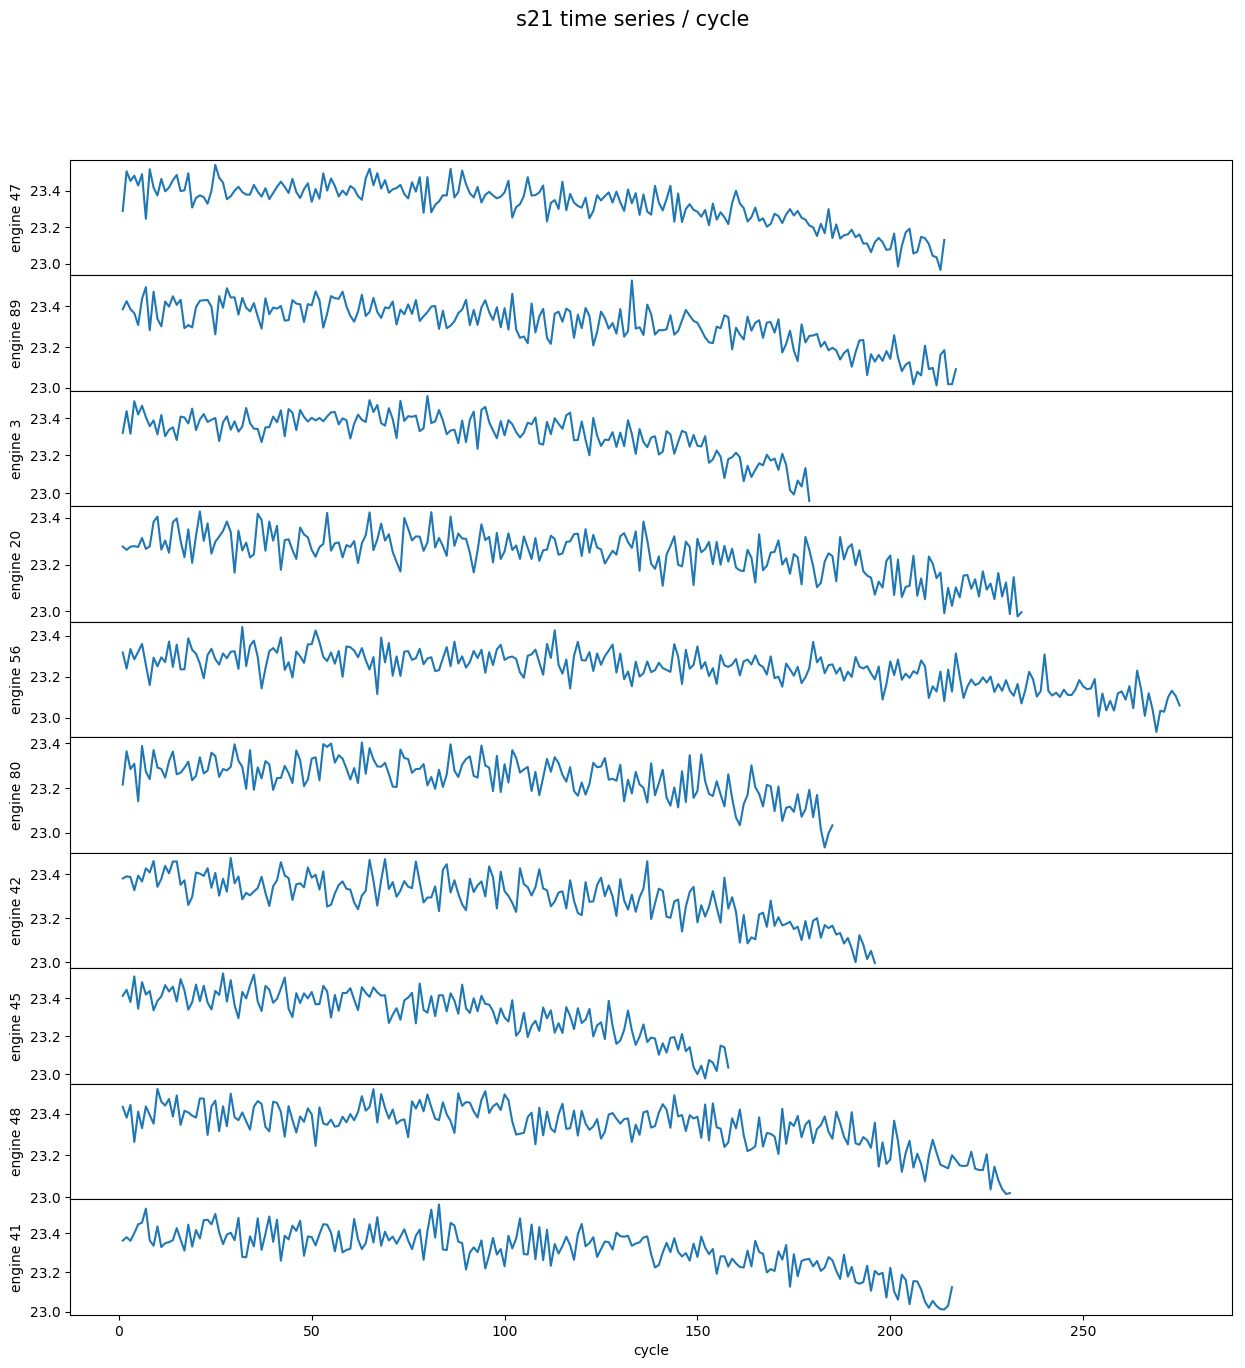

In [20]:
plot_time_series('s21')

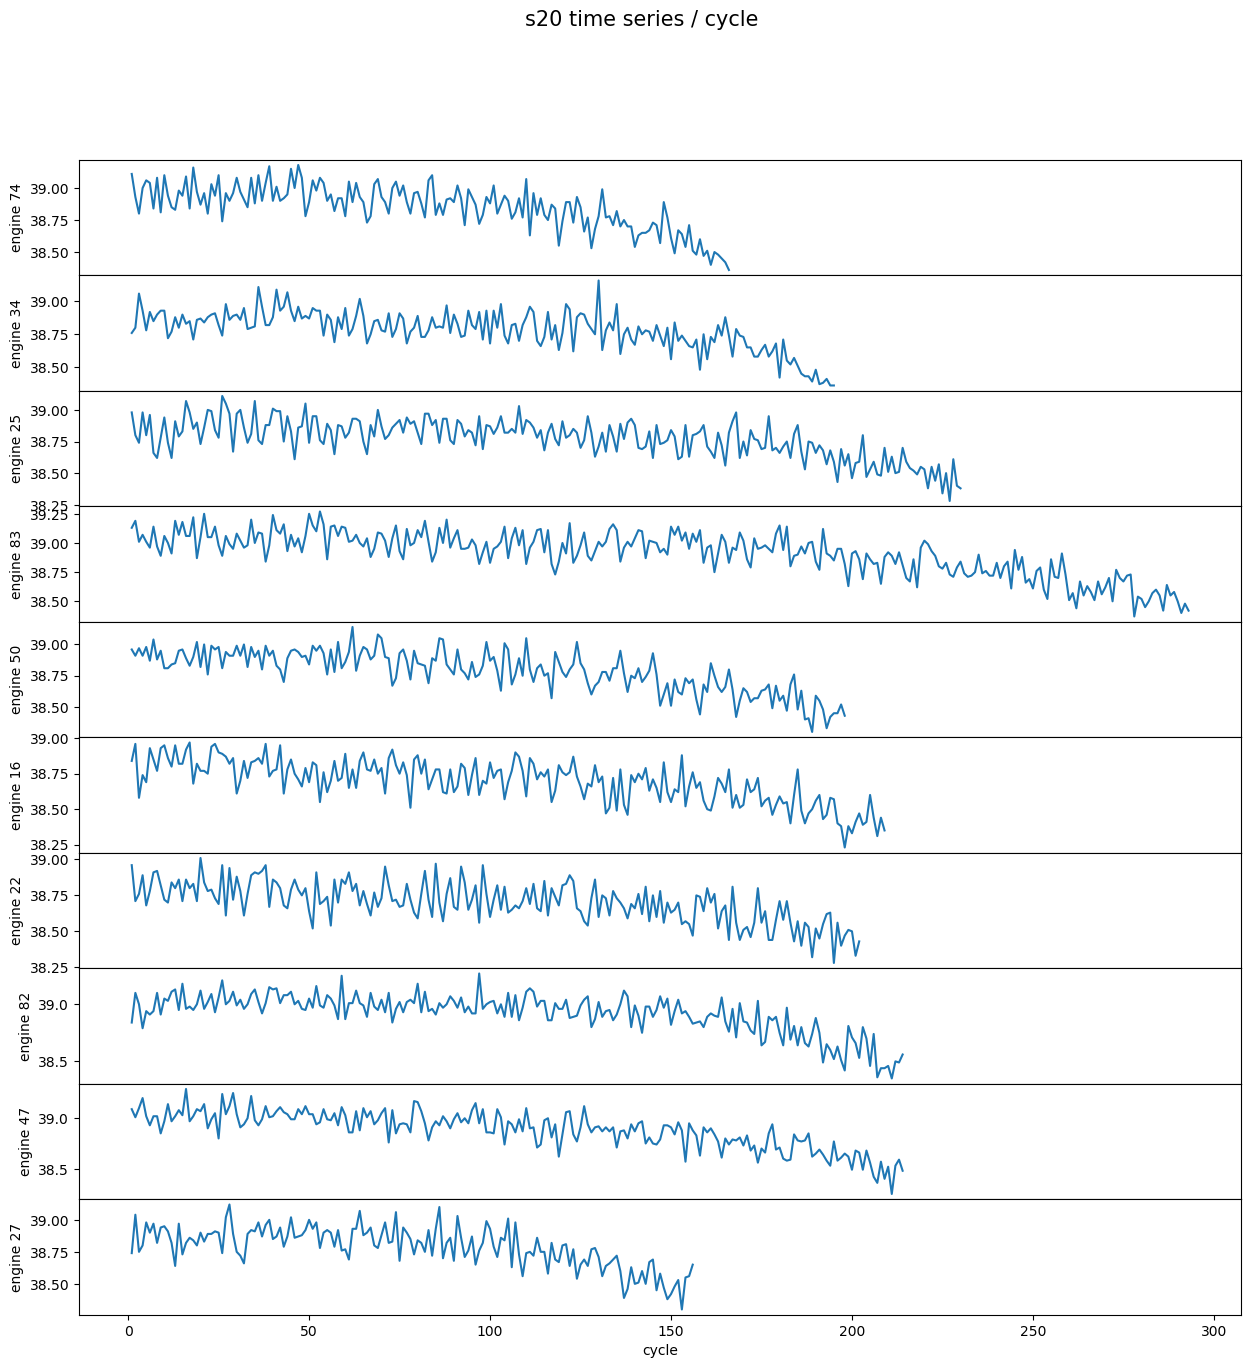

In [21]:
plot_time_series('s20')

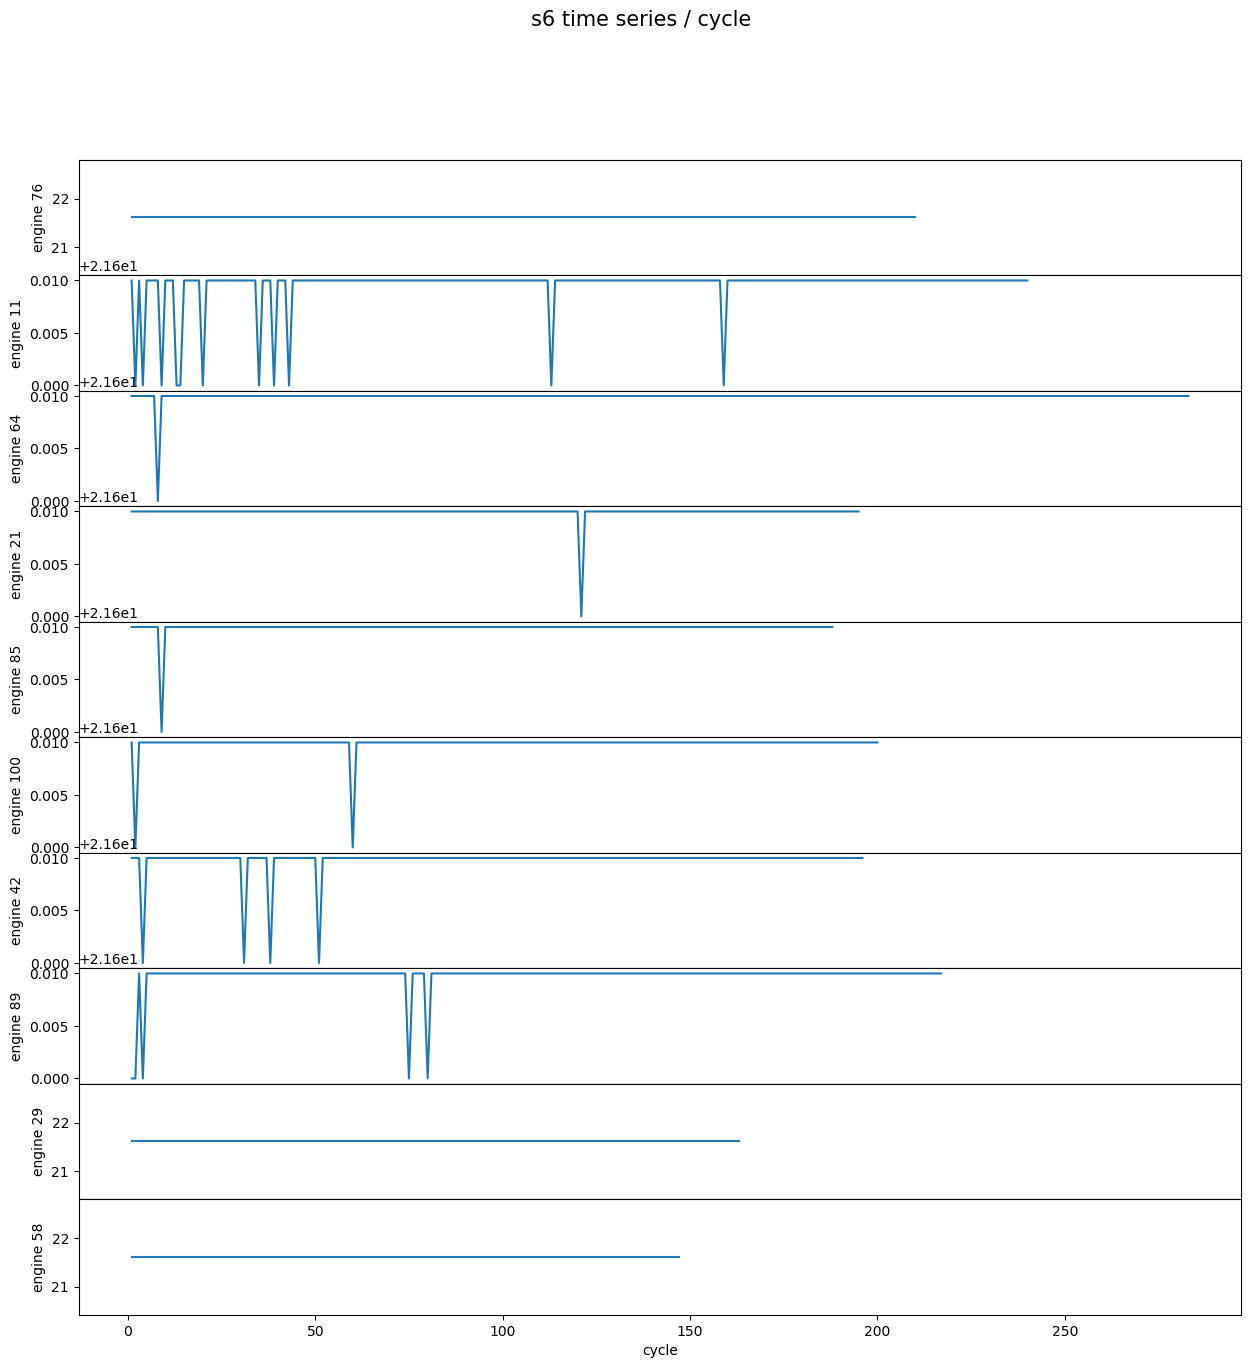

In [22]:
plot_time_series('s6')

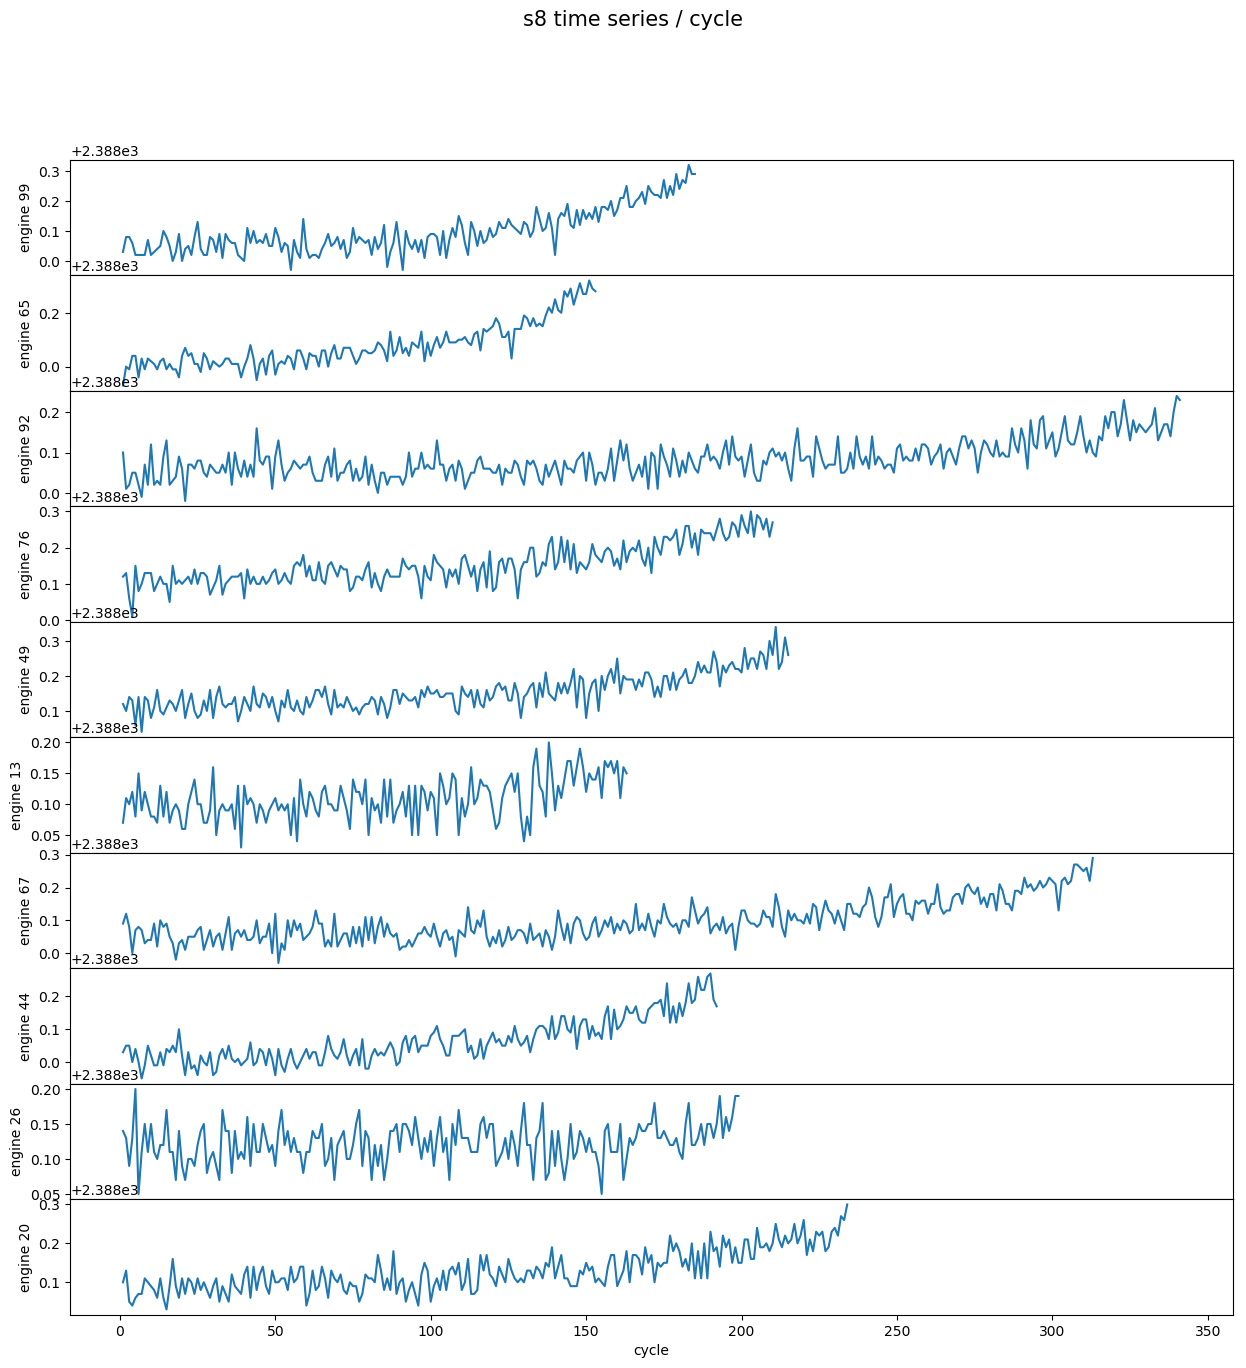

In [23]:
plot_time_series('s8')

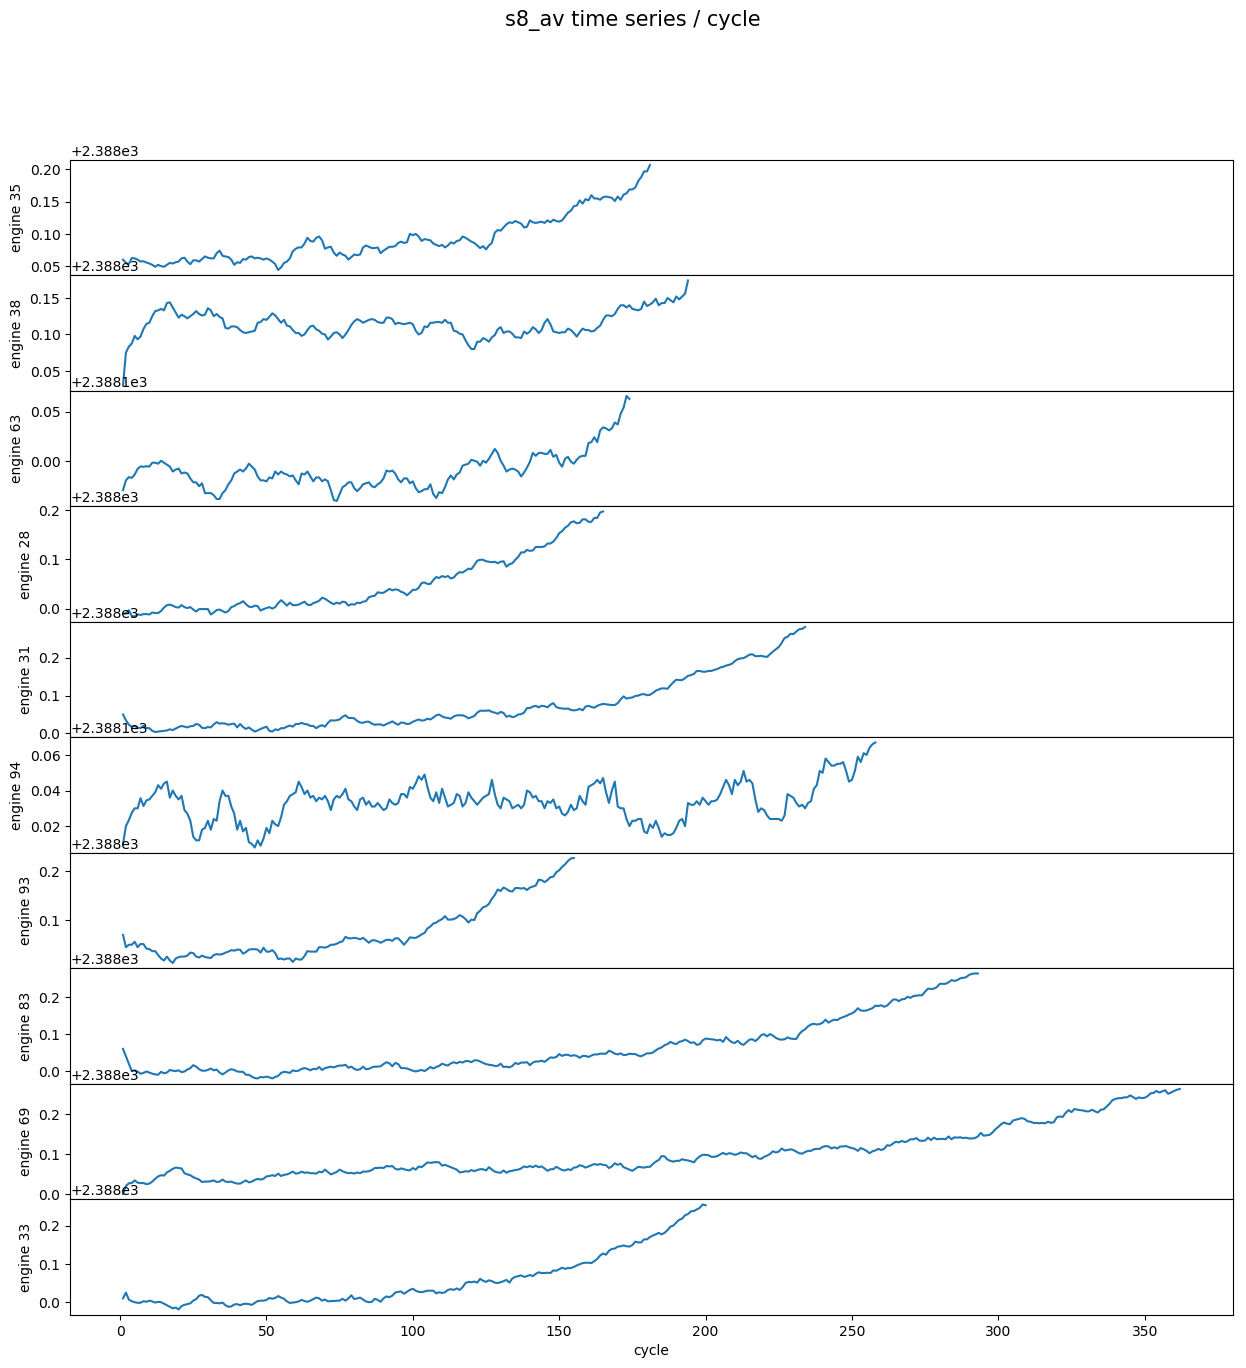

In [24]:
plot_time_series('s8_av')

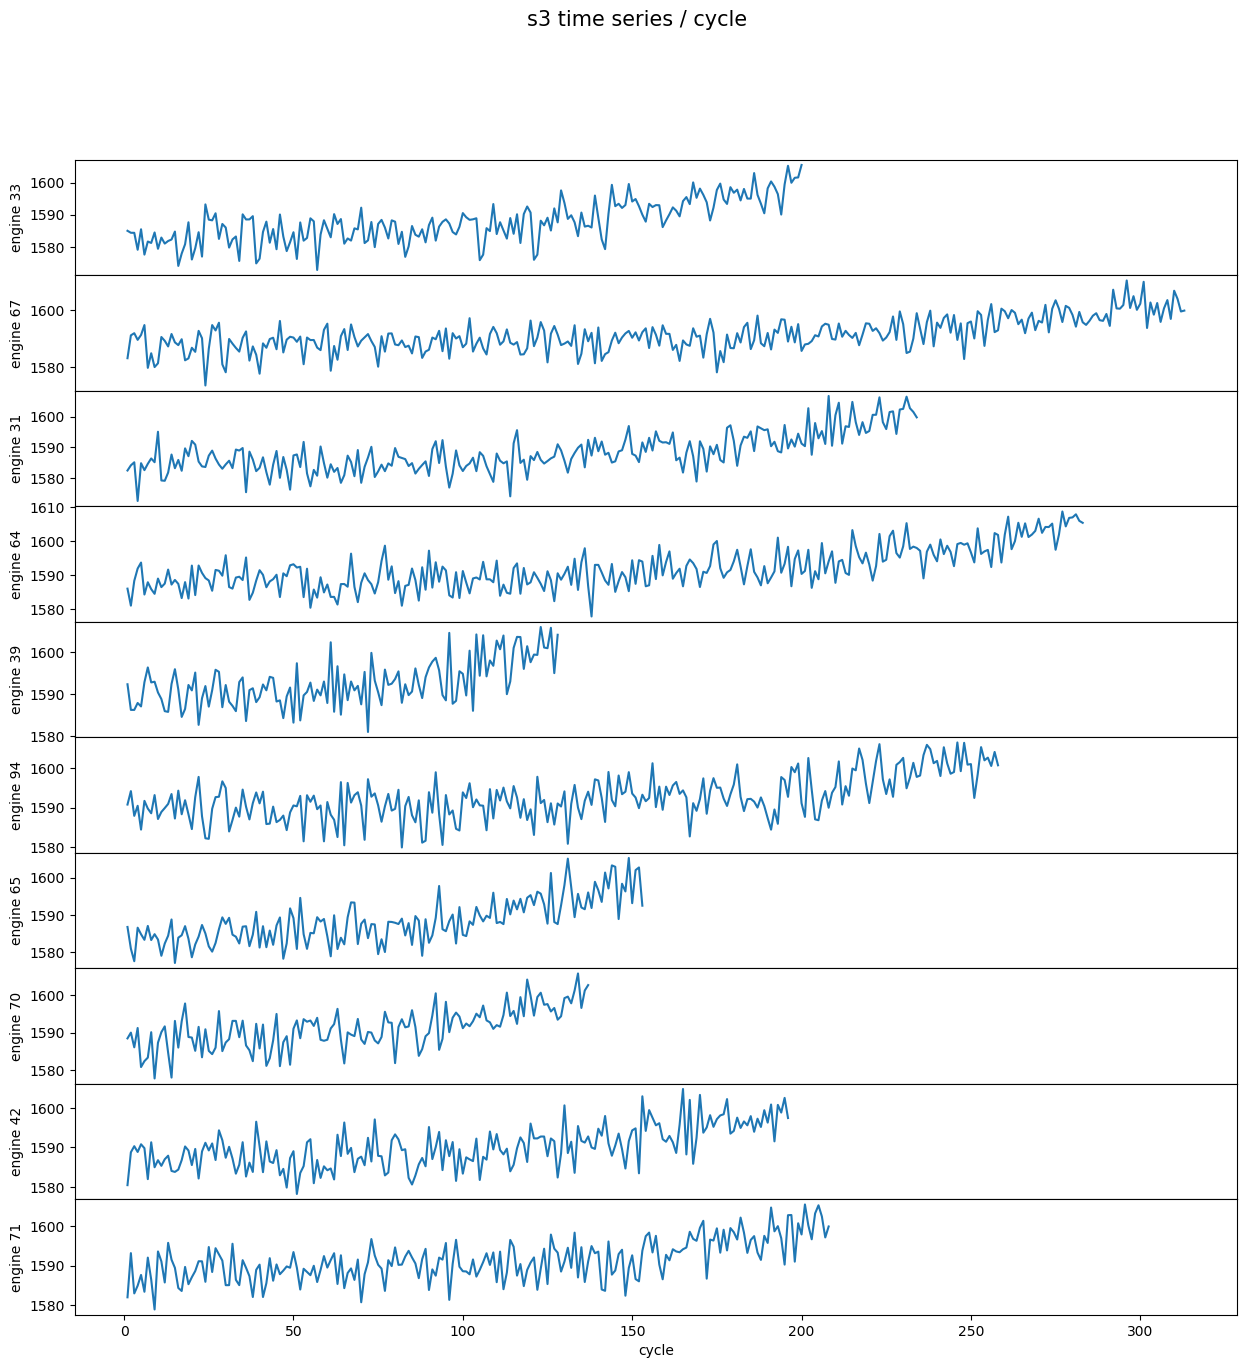

In [25]:
plot_time_series('s3')

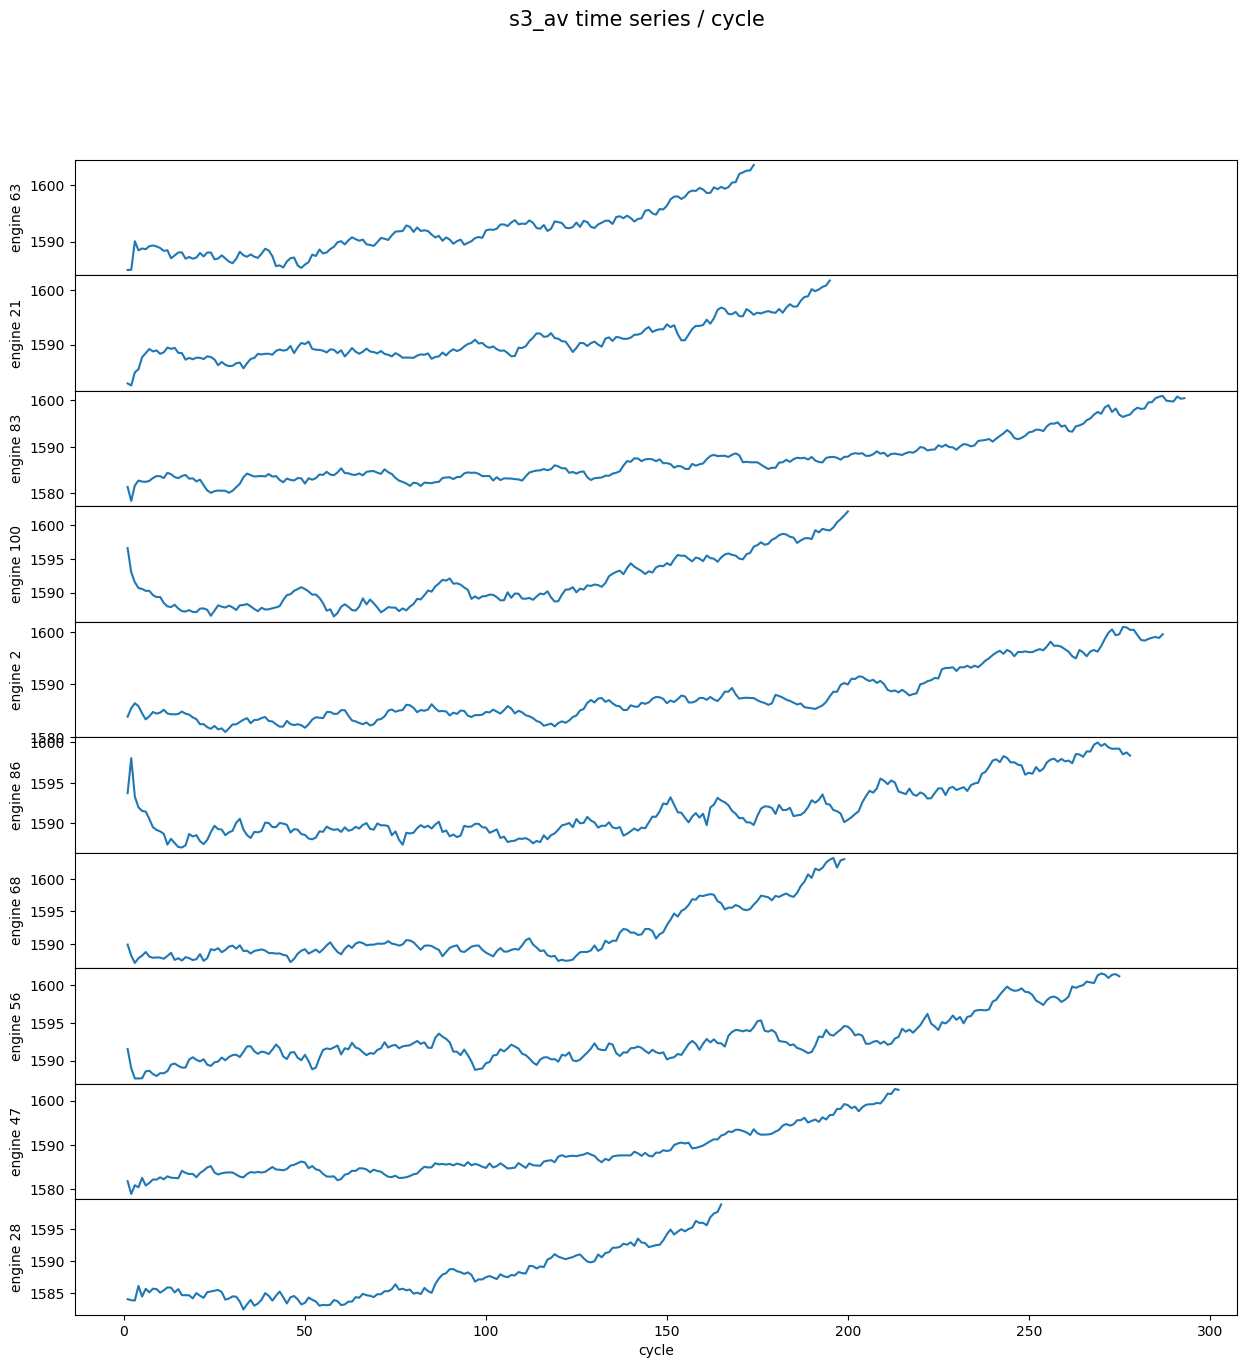

In [26]:
plot_time_series('s3_av')

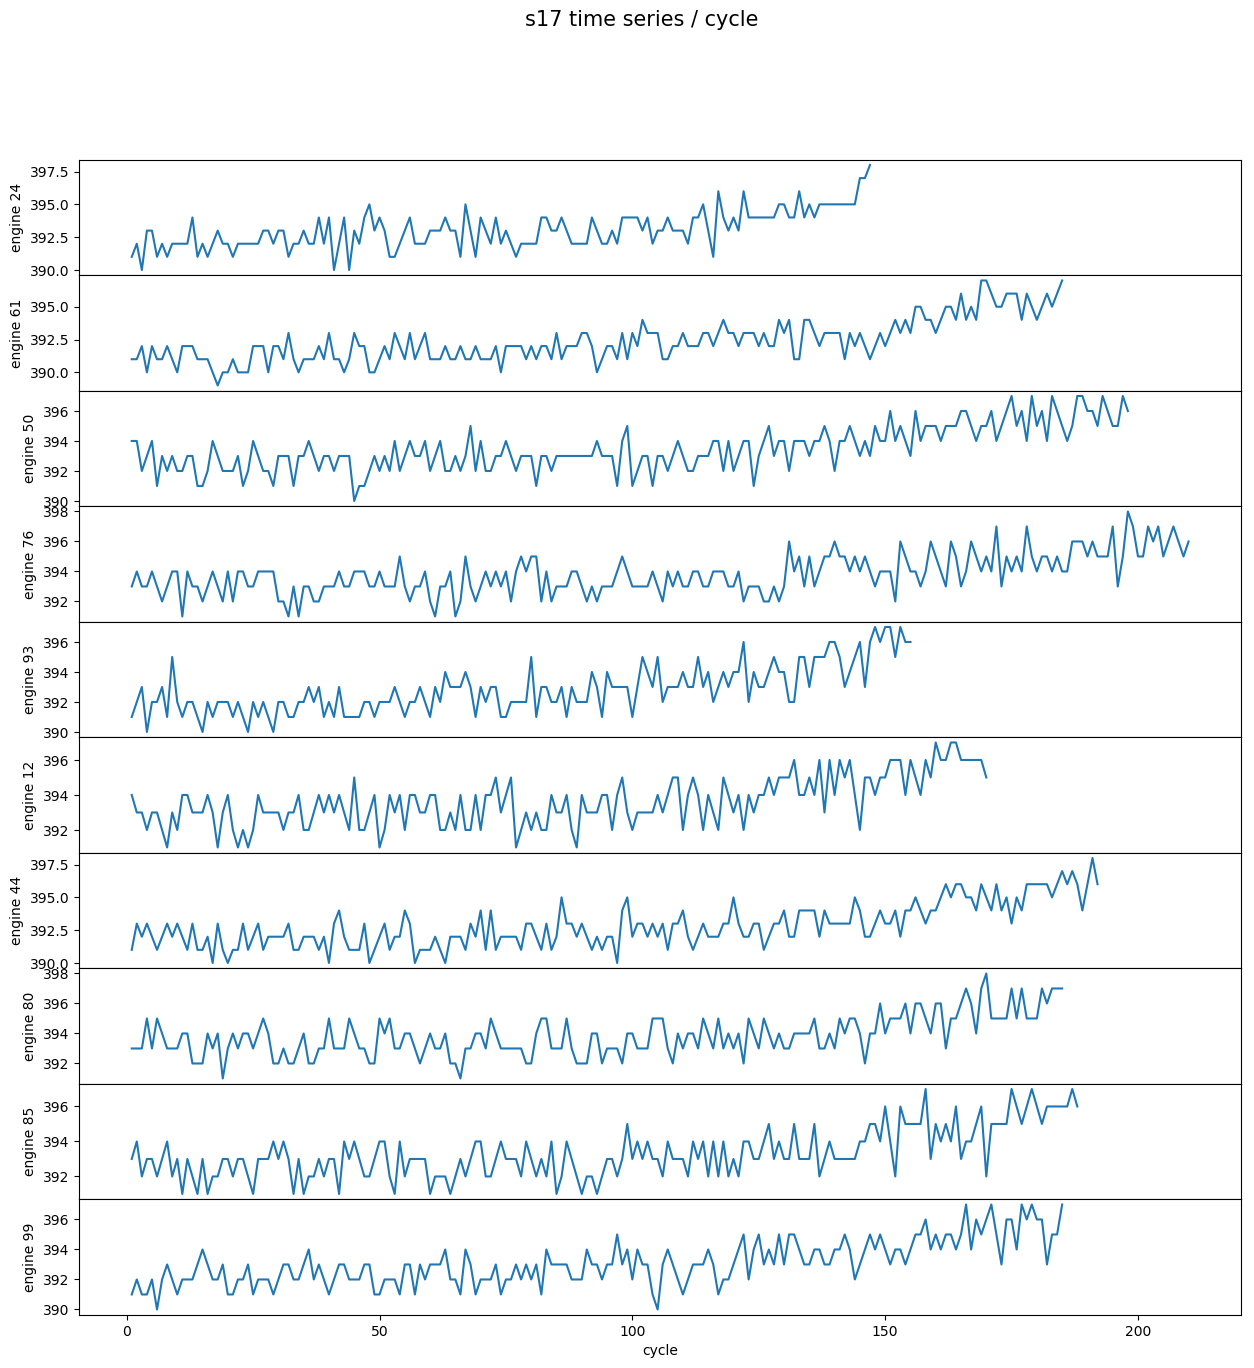

In [27]:
plot_time_series('s17')

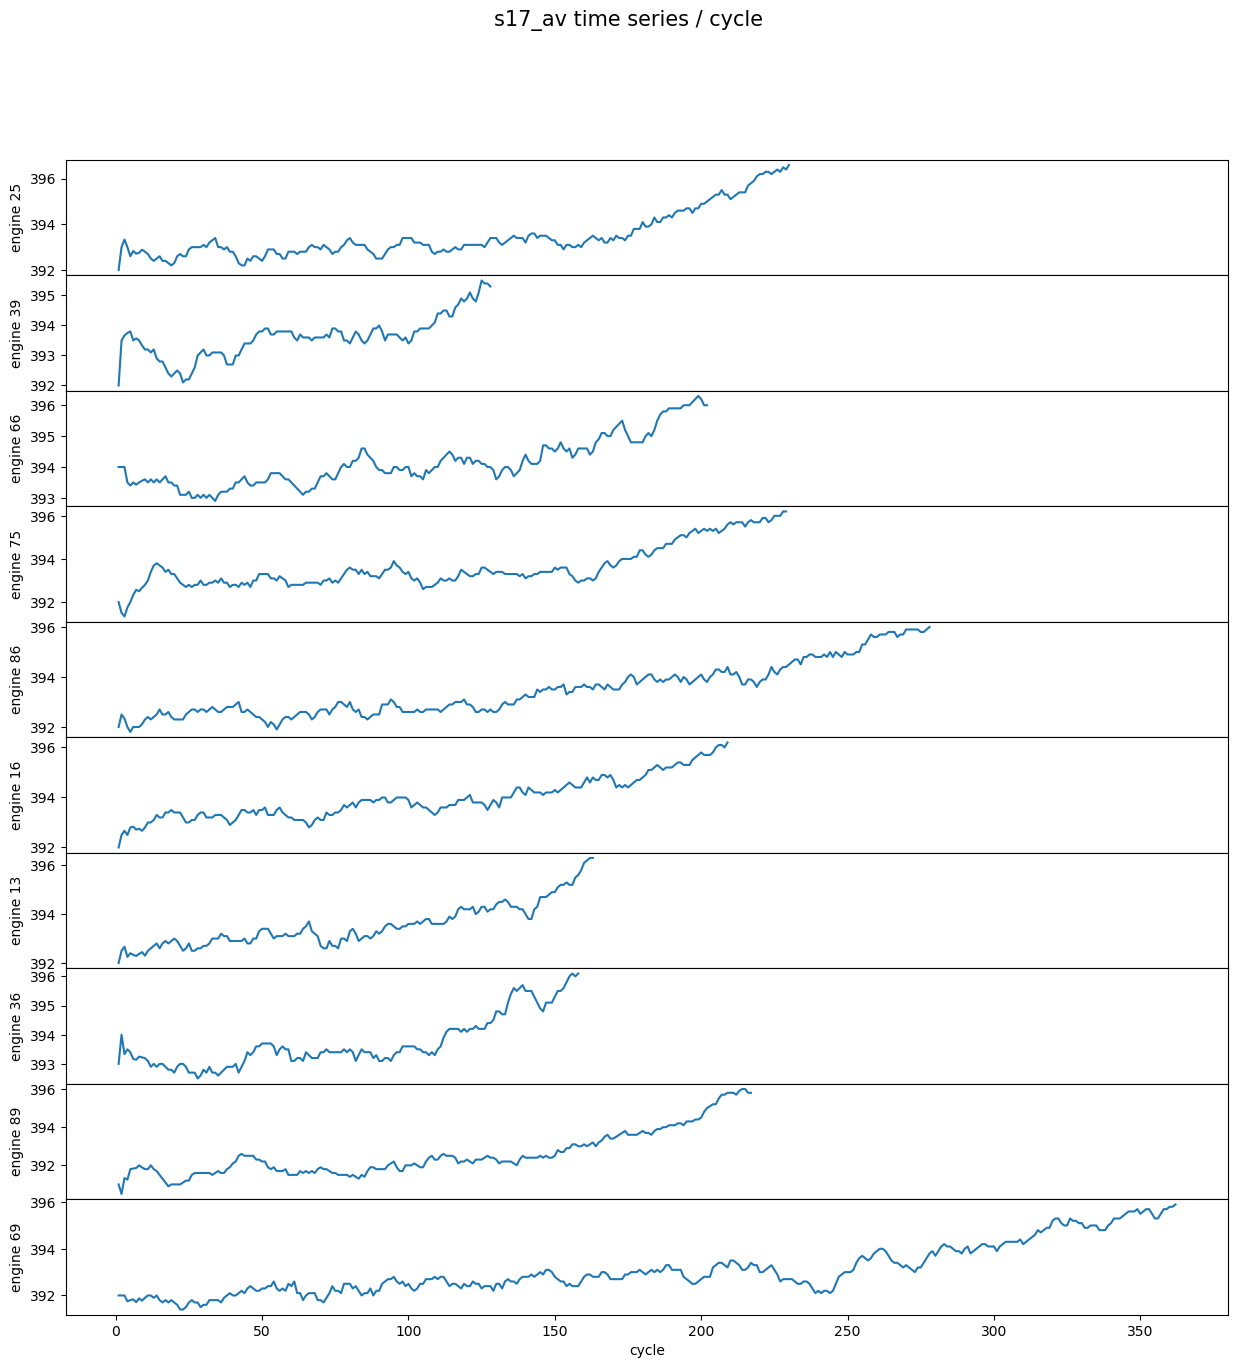

In [28]:
plot_time_series('s17_av')

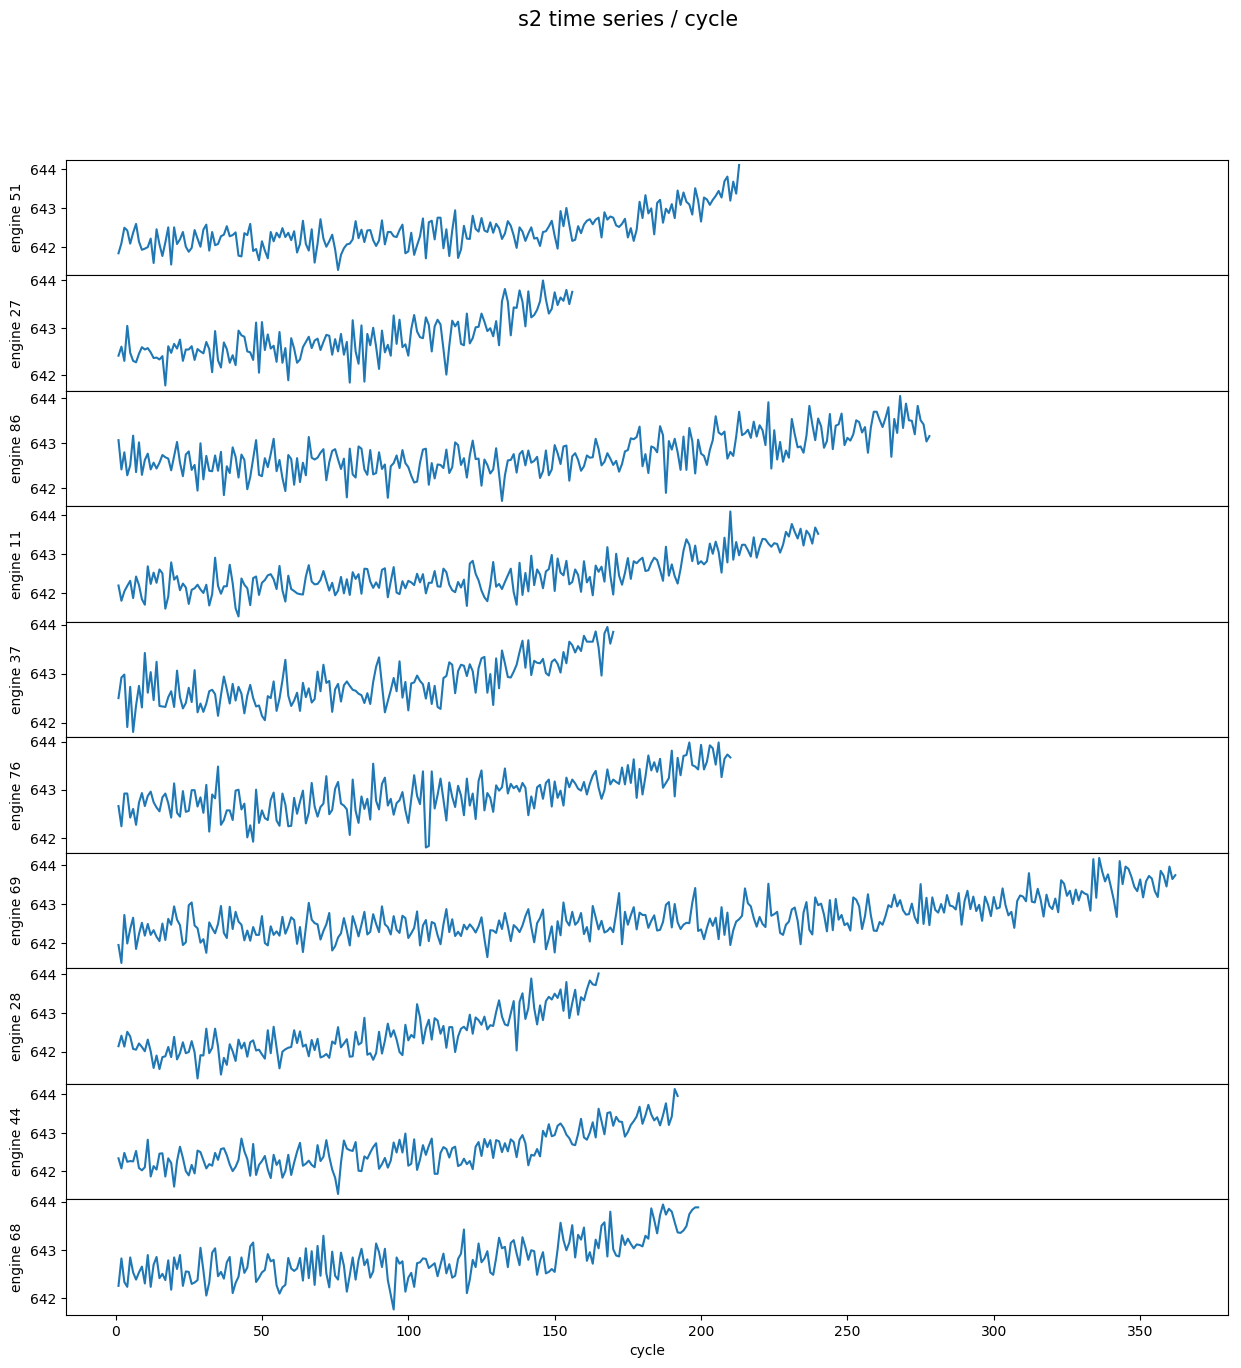

In [29]:
plot_time_series('s2')

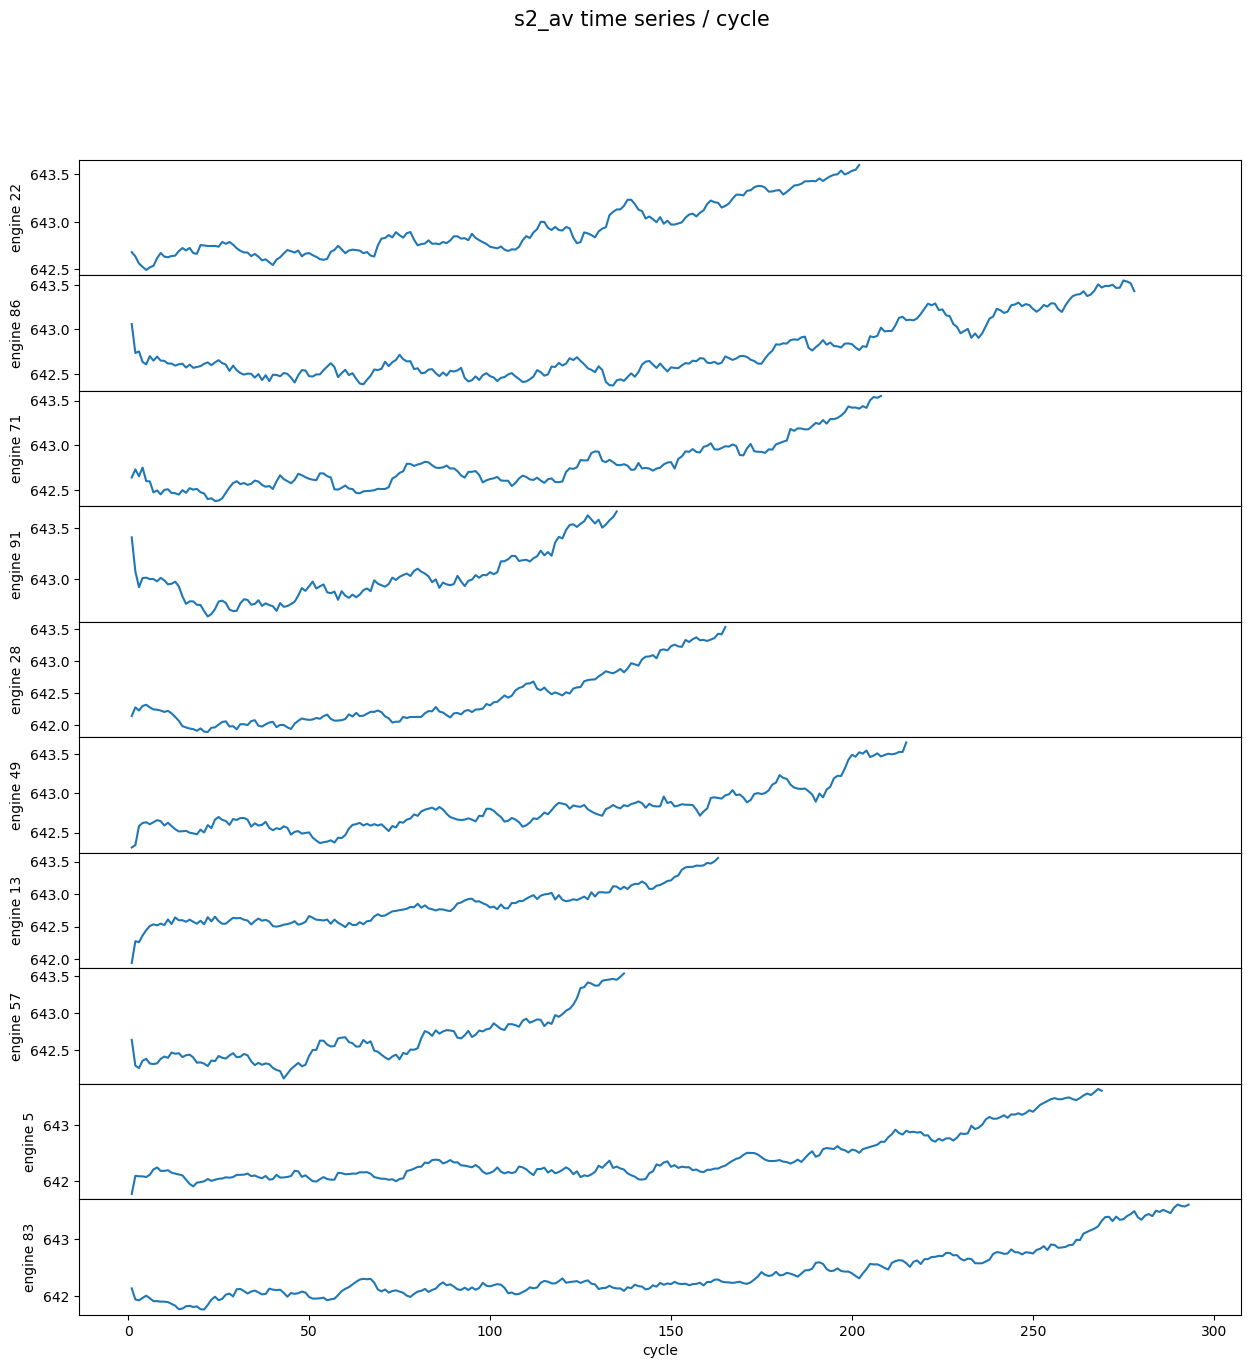

In [30]:
plot_time_series('s2_av')

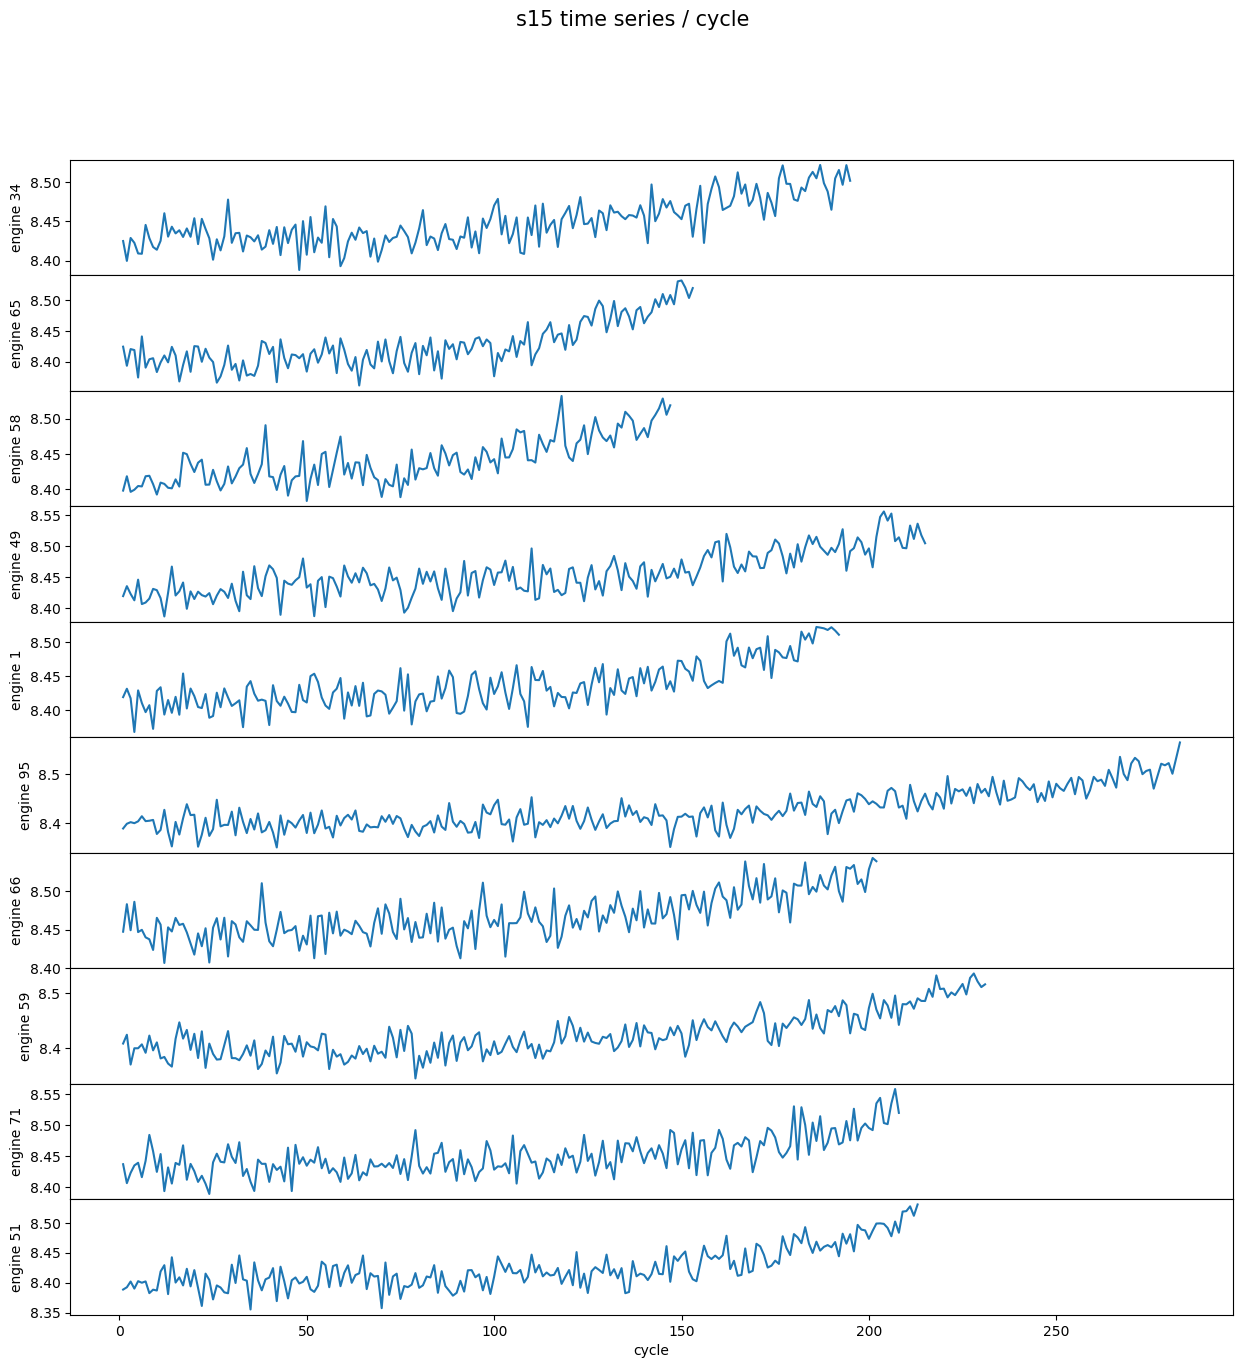

In [31]:
plot_time_series('s15')

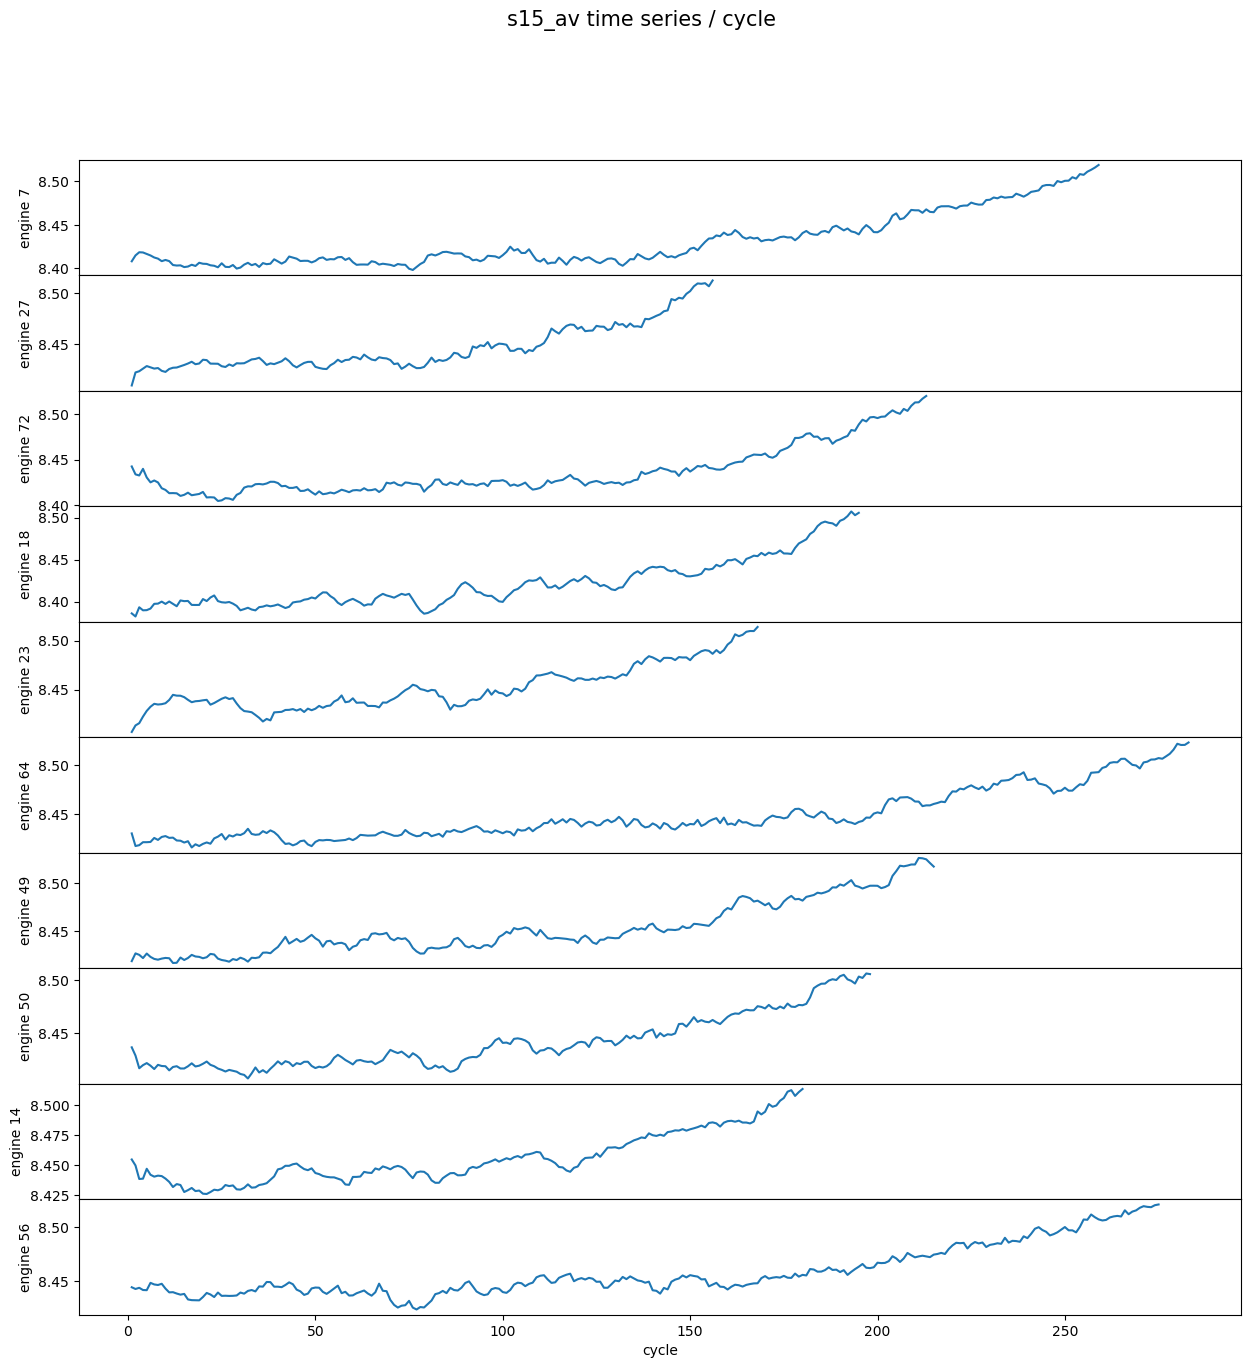

In [32]:
plot_time_series('s15_av')

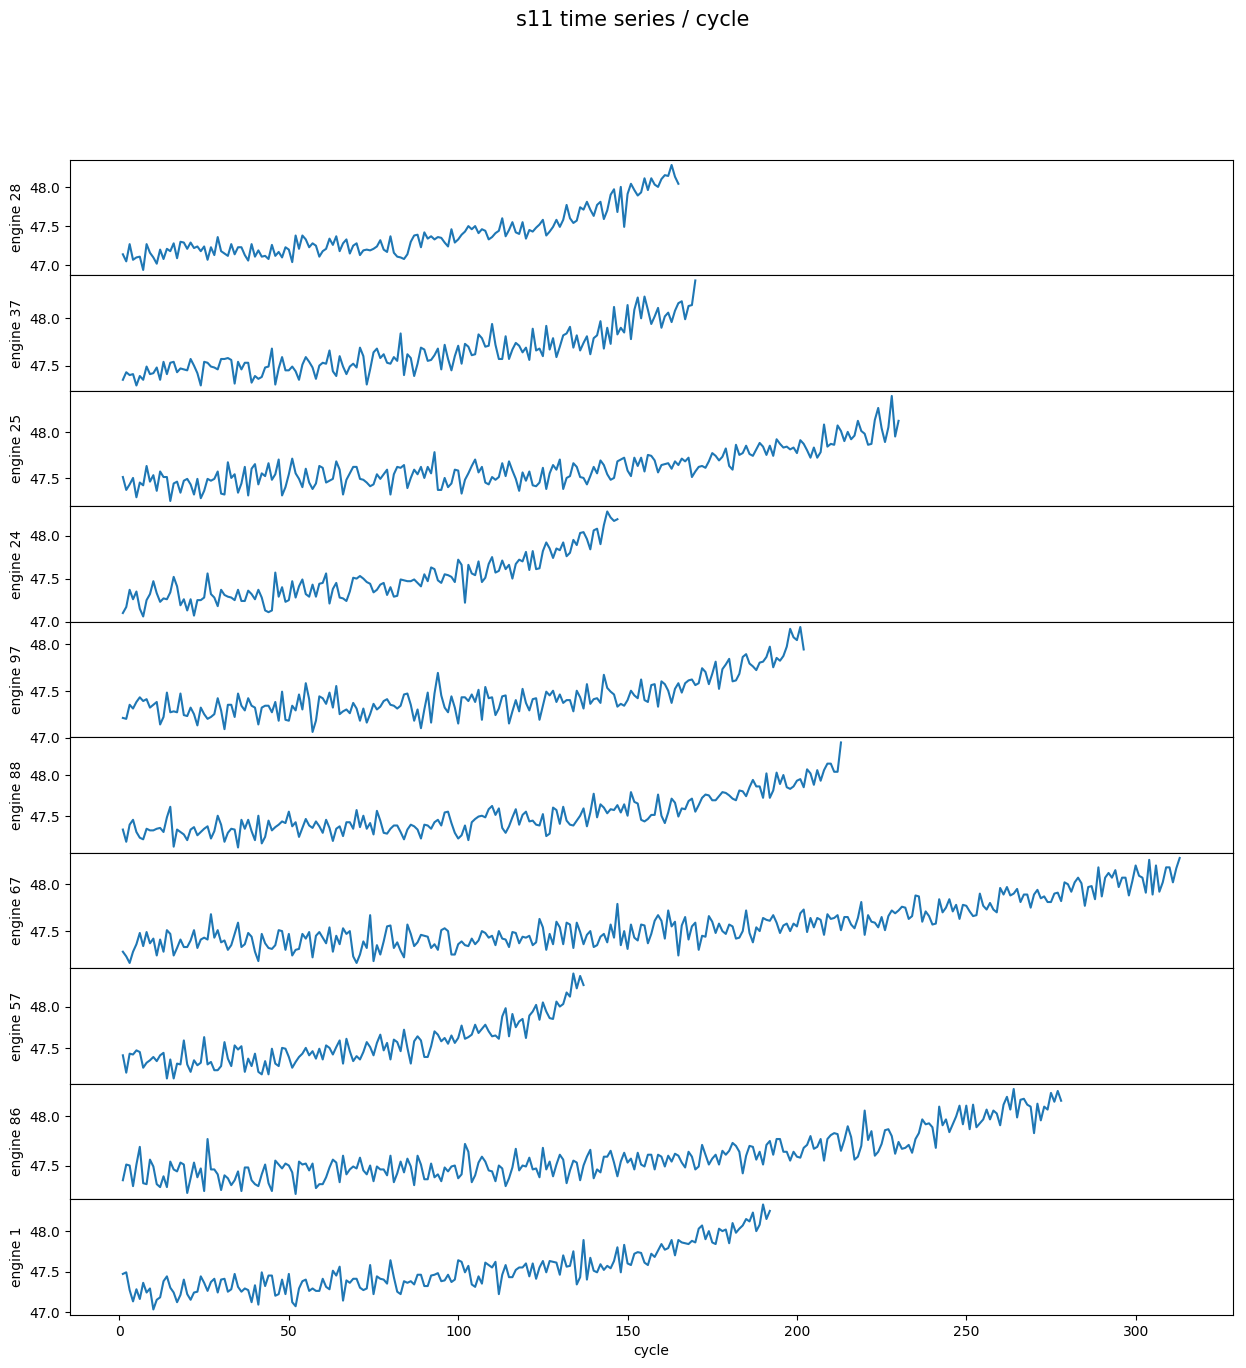

In [33]:
plot_time_series('s11')

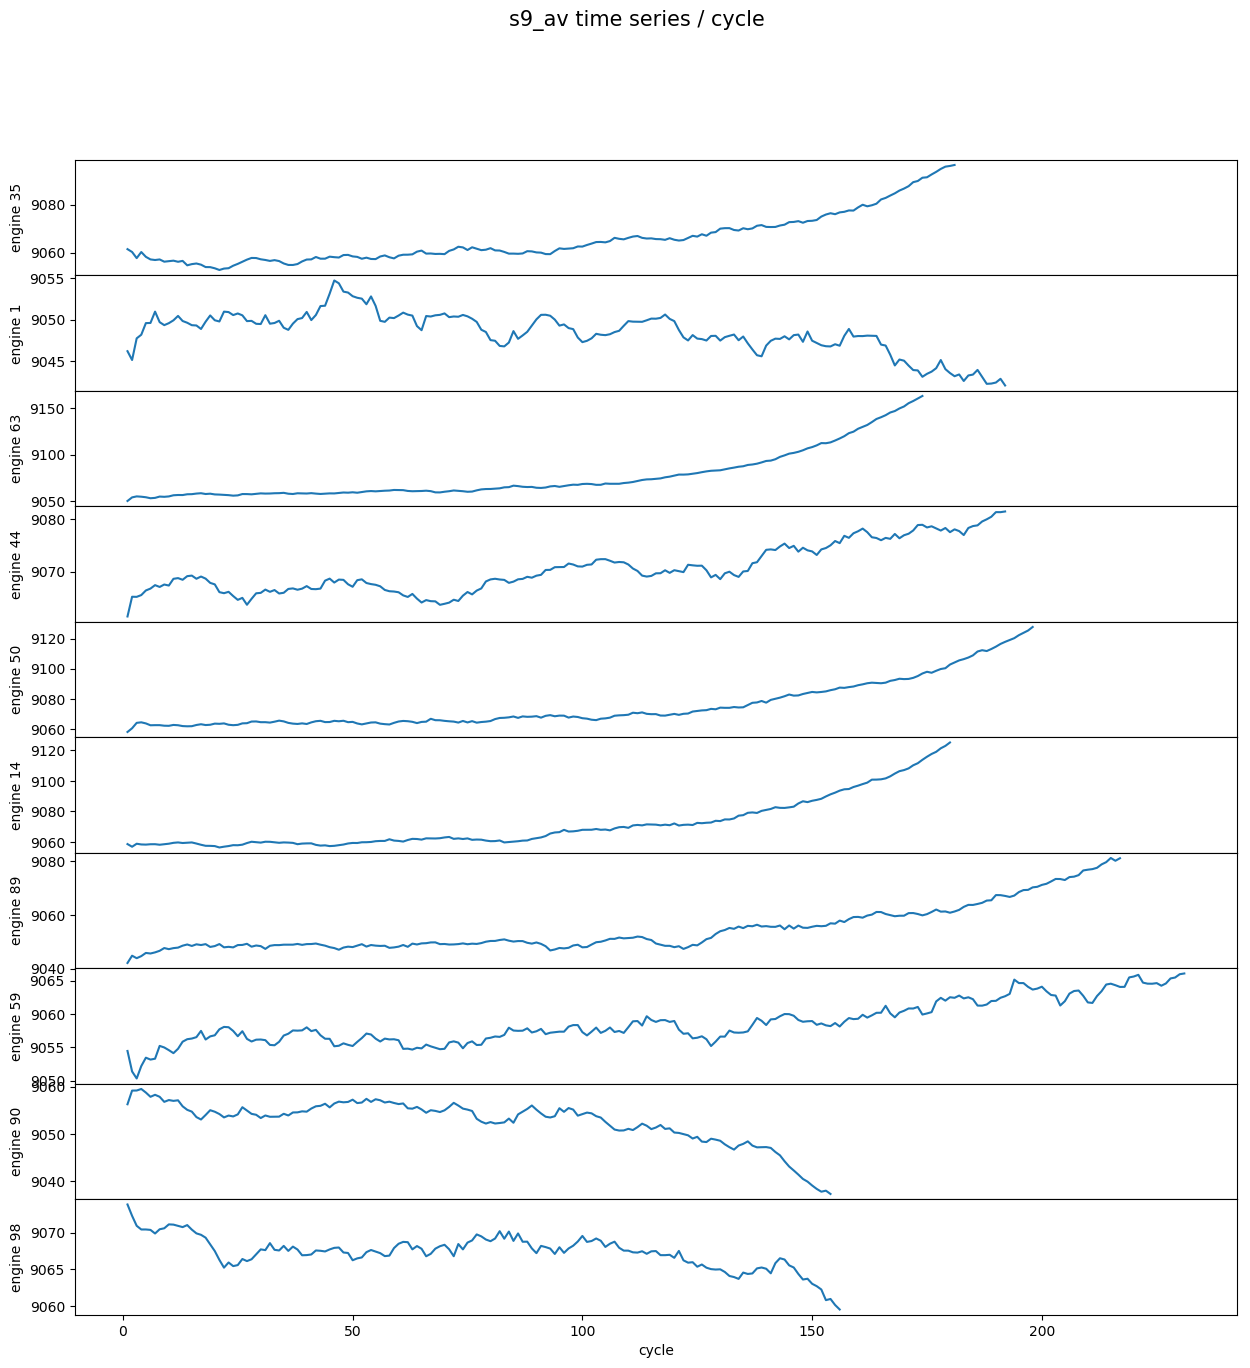

In [34]:
plot_time_series('s9_av')

In [36]:
list(set(selected_features)-set(corr_col)-set(['s6']))

['s9', 's8', 's3', 's17', 's11', 's7', 's15', 's20', 's21', 's2']

In [37]:
features_selection=list(set(selected_features)-set(corr_col)-set(['s6']))
features_selection

['s9', 's8', 's3', 's17', 's11', 's7', 's15', 's20', 's21', 's2']